# Imports

In [38]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import numpy as np
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
REPO_NAME = "dtsne_jedi"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/ooodnakov/{REPO_NAME}.git
!cd {REPO_NAME}
#!pip install ./{REPO_NAME}/dtsnejedi/
#!rm -Rf {REPO_NAME}

Cloning into 'dtsne_jedi'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 162 (delta 87), reused 114 (delta 44), pack-reused 0
Receiving objects: 100% (162/162), 217.41 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [40]:
from dtsne_jedi.dtsnejedi.utils import metrics, data_gen
from dtsne_jedi.dtsnejedi import algorithms

# Define a function to compare different algorithms

In [41]:
def compare_methods(dataset, n_components=2, dataset_name=None, random_state=42):
    if dataset_name is not None:
        assert isinstance(dataset_name, str)
        dataset_name = "'" + dataset_name
        dataset_name += "' dataset, "
    rhos = dict()
    nos = dict()
    dataset_lle, _ = manifold.locally_linear_embedding(dataset, n_neighbors=12,
                                                       n_components=n_components,
                                                       random_state=random_state)
    dataset_tsne = manifold.TSNE(n_components=n_components,
                                 perplexity=20,
                                 random_state=random_state).fit_transform(dataset)
    dataset_dtsne = algorithms.dtsne(dataset, 2, 20, 400, 1, 1)
    dataset_umap = umap.UMAP().fit_transform(dataset)
    Z = np.random.randn(dataset.shape[0], dataset.shape[0]) ** 2 
    Z = Z + Z.T
    dataset_jedi = algorithms.jedi(dataset, Z)
    rhos['LLE'] = metrics.reconstruction_quality(dataset, dataset_lle)
    rhos['tSNE'] = metrics.reconstruction_quality(dataset, dataset_tsne)
    rhos['dtSNE'] = metrics.reconstruction_quality(dataset, dataset_dtsne)
    rhos['UMAP'] = metrics.reconstruction_quality(dataset, dataset_umap)
    rhos['JEDI'] = metrics.reconstruction_quality(dataset, dataset_jedi)
    nos['LLE'] = metrics.neighbourhood_overlap_score(dataset, dataset_lle)
    nos['tSNE'] = metrics.neighbourhood_overlap_score(dataset, dataset_tsne)
    nos['dtSNE'] = metrics.neighbourhood_overlap_score(dataset, dataset_dtsne)
    nos['UMAP'] = metrics.neighbourhood_overlap_score(dataset, dataset_umap)
    nos['JEDI'] = metrics.neighbourhood_overlap_score(dataset, dataset_jedi)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].set_title(dataset_name + "Reconstruction quality", fontsize=15)
    axs[1].set_title(dataset_name + "Neighbourhood overlap score", fontsize=15)
    for i, method in enumerate(rhos):
        step = 0.10
        xs = np.array([0., 0.5, 1.])
        grid = np.linspace(-step, step, len(rhos))
        axs[0].bar(xs + grid[i], rhos[method], width=2*step/(len(rhos)-1), label=method)
        
        xs = np.linspace(0., 1., dataset.shape[0])[1:]
        axs[1].plot(xs, nos[method][1:], label=method)
        axs[1].hlines(1, 0, 1, linestyle='--', color='black', alpha=0.5)
        
        #plt.show()
        #axs[1].bar(xs + grid[i], rhos[method], width=step, label=method)

    axs[0].set_ylim(-1, 1)
    axs[0].set_ylabel("Correlation")
    axs[0].set_xticks(np.array([0., 0.5, 1.]))
    axs[0].set_xticklabels(["global\nreconstruction",
                    "local\nreconstruction",
                    "relative\ndensity\nreconstruction"])
    axs[0].legend()
    axs[1].set_xlim(-0.05, 1.05)
    axs[1].set_ylim(-0.05, 1.05)
    axs[1].set_xlabel("Neighbourhood size in % of data")
    axs[1].set_ylabel("Neighbourhood overlap in %")
    axs[1].legend(loc="lower right")
    plt.show()

In [44]:
def run_experiments(verbose=2, random_state=42):
    datasets_names = ['2D data', 'MNIST', 'G3-s', 'G3-d', 'G10-d', 'U5-d']
    for dataset_name in datasets_names:
        if verbose > 1:
            print("Running experiments for dataset '" + dataset_name + "'")
        if dataset_name != 'MNIST':
            dataset, labels = data_gen.get_dtsne_data(name=dataset_name)
        else:
            mnist = datasets.load_digits()
            dataset, labels = mnist.data, mnist.target
        compare_methods(dataset, dataset_name=dataset_name, random_state=random_state)


# Run experiments

Running experiments for dataset '2D data'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 800/800 [00:05<00:00, 144.88it/s]


Mean value of sigma: 0.597559
Performing optimization...


100%|██████████| 400/400 [00:48<00:00,  8.22it/s]


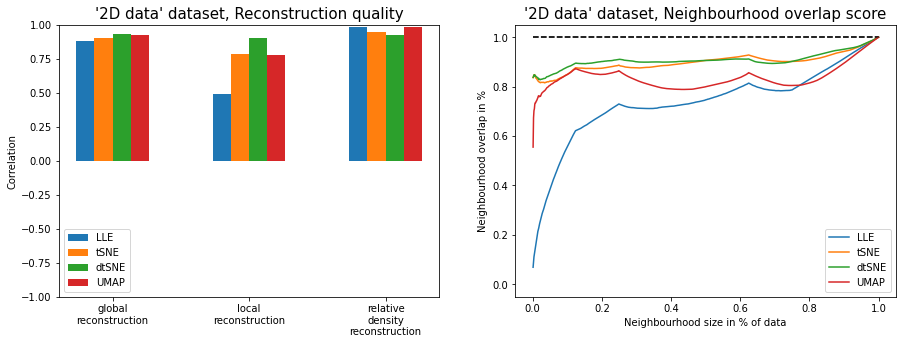

Running experiments for dataset 'MNIST'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 1797/1797 [00:11<00:00, 151.86it/s]


Mean value of sigma: 10.683433
Performing optimization...


100%|██████████| 400/400 [03:15<00:00,  2.05it/s]


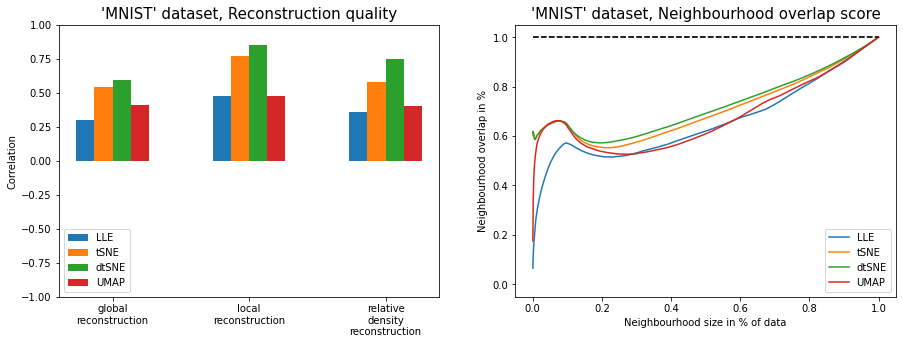

Running experiments for dataset 'G3-s'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 1200/1200 [00:05<00:00, 201.20it/s]


Mean value of sigma: 3.010845
Performing optimization...


100%|██████████| 400/400 [01:26<00:00,  4.65it/s]


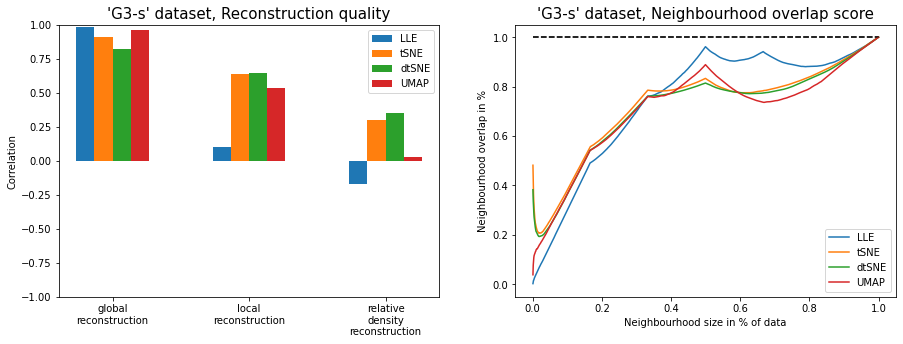

Running experiments for dataset 'G3-d'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 900/900 [00:04<00:00, 217.72it/s]


Mean value of sigma: 4.652766
Performing optimization...


100%|██████████| 400/400 [01:01<00:00,  6.50it/s]


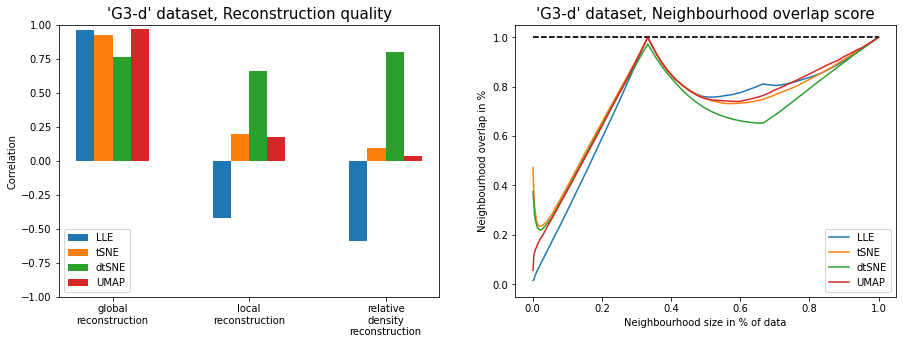

Running experiments for dataset 'G10-d'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 2000/2000 [00:14<00:00, 142.17it/s]


Mean value of sigma: 5.293852
Performing optimization...


100%|██████████| 400/400 [04:09<00:00,  1.60it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


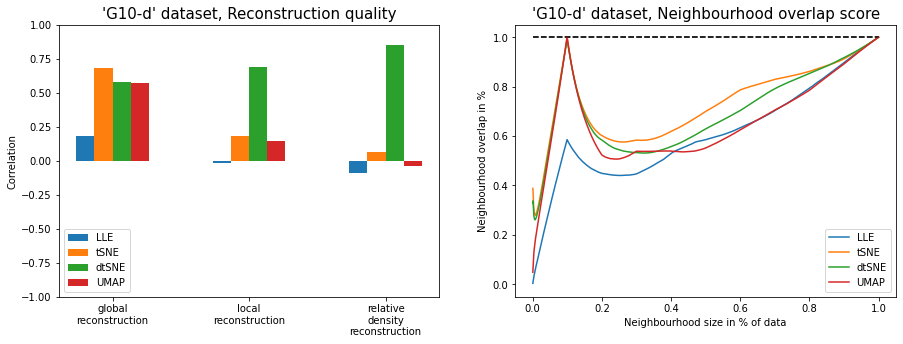

Running experiments for dataset 'U5-d'
Runs dtSNE variant of algorithm.
Getting initial embedding using PCA...
Computing pairwise distances...


100%|██████████| 1000/1000 [00:05<00:00, 196.05it/s]


Mean value of sigma: 5.415056
Performing optimization...


100%|██████████| 400/400 [01:12<00:00,  5.54it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


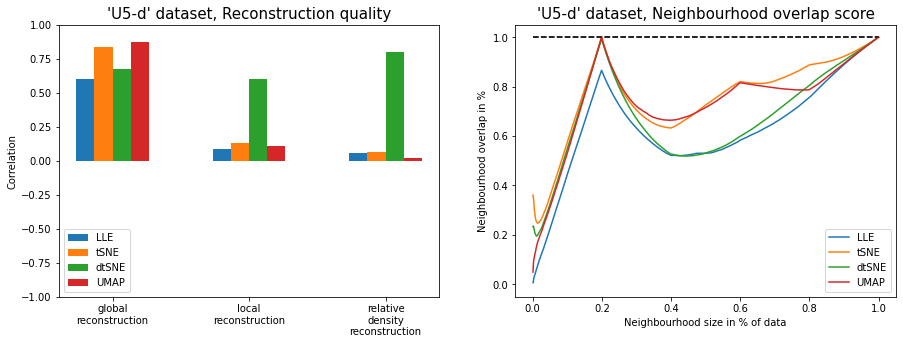

In [45]:
run_experiments(random_state=42)